# 数据挖掘互评作业三：分类与预测

## 酒店预订需求

数据集：Hotel booking demand  
链接：https://www.kaggle.com/jessemostipak/hotel-booking-demand

导入所需要的package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

读取数据

In [2]:
df = pd.read_csv("D:/hotel_booking/hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 1. 基本情况：城市酒店和假日酒店预订需求和入住率比较

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

可以看到城市酒店的预订信息比假日酒店的预订信息更多

#### 缺失值情况及缺失值的处理

In [7]:
df.isnull().any() #每列是否有缺失值

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [8]:
df.isnull().sum() #每列的缺失值总行数

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
nan_replace = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
df_cln = df.fillna(nan_replace)
df_cln["meal"].replace("Undefined", "SC", inplace=True)
zero_guests = list(df_cln.loc[df_cln["adults"]
                   + df_cln["children"]
                   + df_cln["babies"]==0].index)
df_cln.drop(df_cln.index[zero_guests], inplace=True)

In [10]:
df = df_cln

In [11]:
df.shape

(119210, 32)

In [12]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


In [13]:
df.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

可见某些缺失值被删除或填补了,所以没有缺失值了

#### 酒店预定需求以及入住率比较

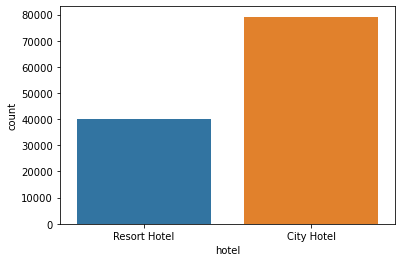

In [14]:
sns.countplot(df.hotel)

从上图可以看到就酒店预定来说城市酒店比假日酒店更受欢迎，人们更喜欢预定城市酒店

In [15]:
df.hotel.value_counts() #酒店的预定情况

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [16]:
city_count_book = 79163
resort_count_book = 40047

In [17]:
df[df['hotel'] == 'Resort Hotel'].is_canceled.value_counts() #取消预定情况

0    28927
1    11120
Name: is_canceled, dtype: int64

可见预定假日酒店没有取消预订（入住）的有28927条

In [18]:
resort_check_in = 28927

In [19]:
df[df['hotel'] == 'City Hotel'].is_canceled.value_counts()

0    46084
1    33079
Name: is_canceled, dtype: int64

In [20]:
city_check_in = 46084

#### 入住率=入住总数/预定总数

In [21]:
print('城市酒店入住率：', city_check_in/city_count_book)

城市酒店入住率： 0.5821406465141543


In [22]:
print('假日酒店入住率：', resort_check_in/resort_count_book)

假日酒店入住率： 0.7223262666367019


可见虽然城市酒店的酒店预定率更高，更受欢迎，但是假日酒店的酒店入住率更高

### 2. 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况

##### 2.1 提前预定时间

In [23]:
time_list = list(df['lead_time'])
print('均值:', np.mean(time_list))
print("中位数：",np.median(time_list))
print("最小值：",min(time_list))
print("最大值：",max(time_list))
print("四分位数:",np.percentile(time_list, (25, 50, 75), interpolation='midpoint'))
counts = np.bincount(time_list)
print("众数：",np.argmax(counts))

均值: 104.10922741380756
中位数： 69.0
最小值： 0
最大值： 737
四分位数: [ 18.  69. 161.]
众数： 0


从上述数据分析顾客平均提前预定时间为104天左右，预定最久的天数为737天，将近两年多。大部分顾客都是当天预定当天入住。

##### 2.2 入住时长

In [24]:
df['stay_time'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [25]:
stay_list = list(df['stay_time'])
print('均值:', np.mean(stay_list))
print("中位数：",np.median(stay_list))
print("最小值：",min(stay_list))
print("最大值：",max(stay_list))
print("四分位数:",np.percentile(stay_list, (25, 50, 75), interpolation='midpoint'))
counts = np.bincount(stay_list)
print("众数：",np.argmax(counts))

均值: 3.4262477980035233
中位数： 3.0
最小值： 0
最大值： 69
四分位数: [2. 3. 4.]
众数： 2


从以上数据来看，平均入住晚数为3晚左右，最大入住晚数为69天，两个多月，其中大部分顾客入住2晚。

##### 2.3 预定间隔

好像没有数据可以得知这个属性，不明白这个啥意思

##### 2.4 餐食预订情况

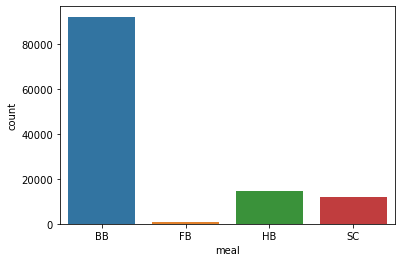

In [26]:
sns.countplot(df.meal)

由上图可见，大多数人会在酒店中订餐，其中大部分人预定了BB这个套餐类型，很少人订FB这个套餐类型。当然不是所有人都会在酒店订餐，少部分人不需要订餐服务（SC）

### 3. 最佳预订酒店时间

酒店入住情况柱状图

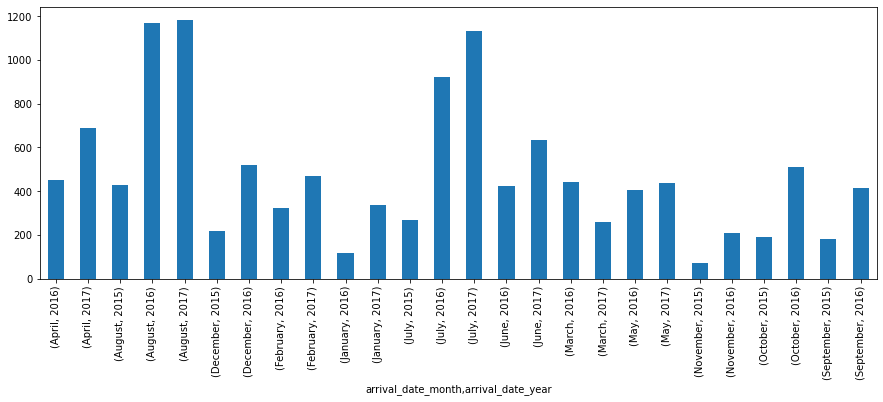

In [27]:
df.groupby(['arrival_date_month','arrival_date_year'])['children'].sum().plot.bar(figsize=(15,5))

酒店平均价格-时间段折线图

In [28]:
name_list = []
price_list = []
for s in df.groupby(['arrival_date_month','arrival_date_year'])['adr']:
    name_list.append(list(s)[0])
    price_list.append(np.mean(list(s)[1].values))

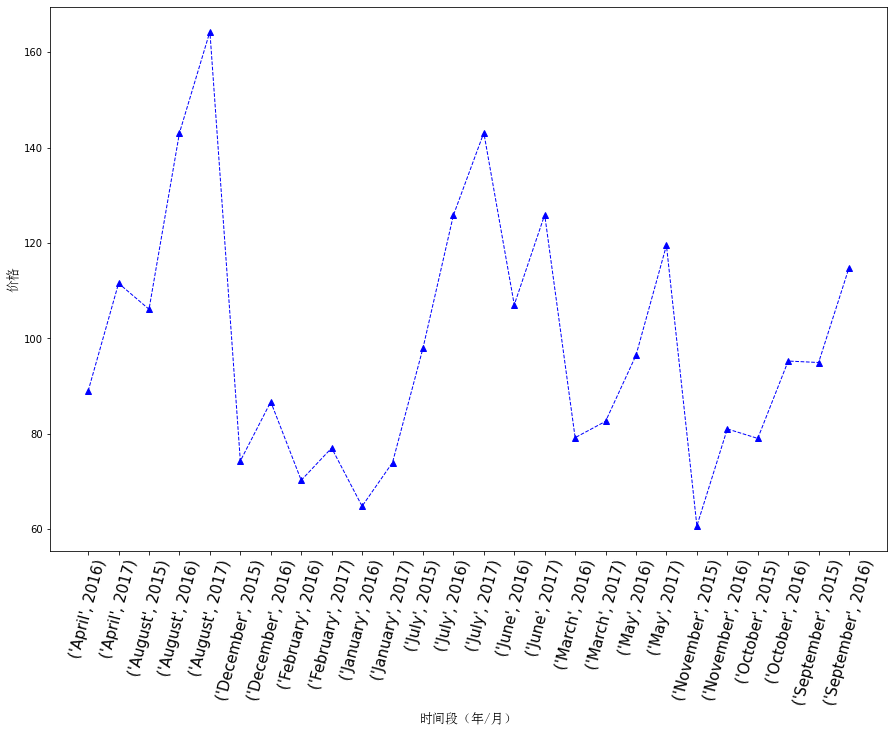

In [29]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

plt.figure(figsize=(15,10))
font = FontProperties(fname=r"C:\windows\fonts\simsun.ttc", size=13)
plt.xlabel(u'时间段（年/月）', fontproperties=font, fontdict={'family': 'Times New Roman',
                                                 'color': 'black',
                                                 'weight': 'normal',
                                                 'size': 13})
plt.ylabel(u'价格', fontproperties=font, fontdict={'family': 'Times New Roman',
                                                  'fontstyle': 'italic',
                                                  'color': 'black',
                                                  'weight': 'normal',
                                                  'size': 13})

# 将x轴的刻度设为字符
x = range(len(price_list))
plt.xticks(range(len(price_list)), name_list, fontsize=15, rotation=75)

value = np.array(price_list)
l1, = plt.plot(x, value, '--', color='b', linewidth=1, marker='^')

plt.show()

结合“酒店入住情况柱状图”和“酒店平均价格-时间段折线图”来看，对于顾客来说，最佳预定酒店的时间应为每年的1、2月和11、12月，这几个时间段的酒店的入住人数少且价格较低，是最佳的酒店预定入住时间。

### 4. 利用Logistic预测酒店预订

In [30]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
stay_time                         0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [31]:
df.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [32]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]


num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])
base_models = [("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]
kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
   
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

LR_model cross validation accuarcy score: 0.7947 +/- 0.0027 (std) min: 0.7915, max: 0.7984


用逻辑回归来预测的准确率如上结果所示

github链接：https://github.com/LIMINQIN/DataMining-Work3